In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station =  Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [75]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [88]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


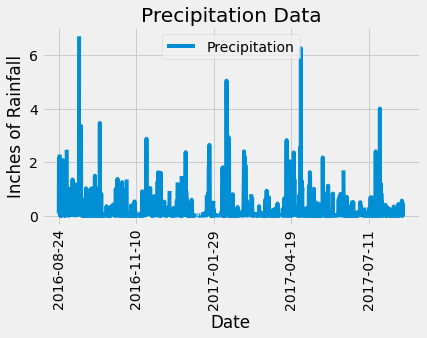

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# dates = [results[1] for result in results]
# precip = [results[0] for result in results]
# Calculate the date 1 year ago from the last data point in the database
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(end_date)
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(first_date)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date','Precipitation'])
# Sort the dataframe by date
df = df.sort_values(by=['Date'], ascending=False)
df = df.set_index('Date')
# Use Pandas Plotting with Matplotlib to plot the data
df.iloc[::-1].plot(title='Precipitation Data')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.ylabel('Inches of Rainfall')
plt.show()

In [87]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
station_count = [station_count[0] for count in station_count[:1]]
print(f'Station count: {station_count}')

Station count: [(9,)]


In [95]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, Station.name, func.count(Measurement.station)]
active_stations = session.query(*sel).filter(Station.station == Measurement.station).group_by(Measurement.station).all()
print('Station Activity')
print('---------------------------------')
for record in active_stations:
    (measurement_station, station_name, station_count) = record
    print('---------------------------------')
    print(f"{station_name} has a total of {station_count} records")

Station Activity
---------------------------------
---------------------------------
HONOLULU OBSERVATORY 702.2, HI US has a total of 1979 records
---------------------------------
KANEOHE 838.1, HI US has a total of 2709 records
---------------------------------
KUALOA RANCH HEADQUARTERS 886.9, HI US has a total of 2202 records
---------------------------------
MANOA LYON ARBO 785.2, HI US has a total of 2612 records
---------------------------------
PEARL CITY, HI US has a total of 1372 records
---------------------------------
UPPER WAHIAWA 874.3, HI US has a total of 511 records
---------------------------------
WAIHEE 837.5, HI US has a total of 2772 records
---------------------------------
WAIKIKI 717.2, HI US has a total of 2724 records
---------------------------------
WAIMANALO EXPERIMENTAL FARM, HI US has a total of 2669 records


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
